In [29]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from konlpy.tag import Okt
from PIL import Image
from wordcloud import WordCloud
okt = Okt()
import konlpy
import os
import copy
import re
import nltk
import seaborn as sns
from tqdm import tqdm

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 폰트
# plt.rcParams['font.family'] = 'NanumGothicCoding' # 리눅스 폰트

In [4]:
df = pd.read_csv('D:\\WorkSpace\\navercafecrawling\\홀푸드코리아\\야채즙리뷰데이터합_3사.csv')

In [9]:
df.head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,회사명,맛이있다없다,선물관련키워드,키워드분류스
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,미분류,조부모,건강
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,맛이있다,미분류,건강


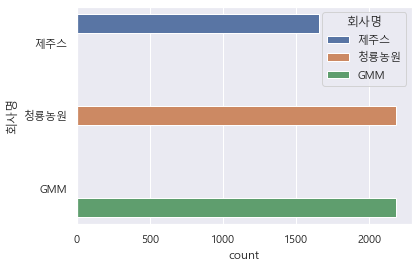

In [22]:
ax = sns.countplot(y="회사명", hue="회사명", data=df)

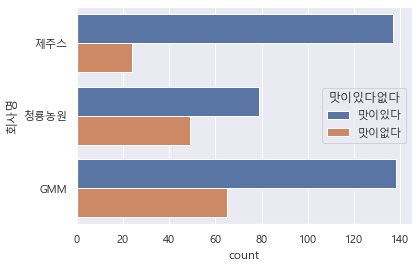

In [21]:
ax = sns.countplot(y="회사명", hue="맛이있다없다", data=df[df.맛이있다없다 !='미분류'])

- 데이터수가 총 2180 2180 1660 이기 때문에 카운트 플랏으로 비교하는게 부적절 할 수 있기 때문에 pie 플랏을 이용한 퍼센테이지 비교를 해야함

### 단어 빈도수 확인 후 키워드 분류하기

In [23]:
df.내용정제

0       번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...
1       안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...
2       신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...
3       친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...
4       요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...
                              ...                        
6015        장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기
6016                  좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기
6017    우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...
6018    좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...
6019    가최고예요매번 먹는 제품이에여할인쿠폰으로 착한 가격으로 구매했어여 먹기에도 편하고 ...
Name: 내용정제, Length: 6020, dtype: object

In [30]:
tokens = []
for words in tqdm(df.내용정제):
    word = okt.nouns(str(words))
    tokens.append(word)

100%|██████████| 6020/6020 [00:45<00:00, 131.99it/s]


In [48]:
tokens[0]

['주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
 '동안',
 '복용',
 '식도염',
 '걸',
 '고생',
 '즙',
 '호전',
 '가장',
 '번',
 '주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
 '동안',
 '복용',
 '식도염',
 '걸',
 '고생',
 '즙',
 '호전',
 '가장',
 '요인',
 '것',
 '혹시',
 '주문',
 '고민',
 '분',
 '번',
 '주문',
 '생각',
 '요즘',
 '바이러스',
 '기승',
 '배달',
 '고민',
 '주문',
 '한지',
 '일만',
 '도착',
 '항상',
 '몸',
 '마스크',
 '꼭꼭',
 '착용',
 '건강',
 '식품',
 '생산',
 '사시',
 '동안',
 '버시',
 '일',
 '리뷰']

In [34]:
tokenss = []
for a in tqdm(tokens):
    for b in a:
        tokenss.append(b)

100%|██████████| 6020/6020 [00:00<00:00, 406002.64it/s]


In [35]:
len(tokenss)

92168

In [50]:
야채즙3사 = nltk.Text(new_tokenss,name='야채즙')

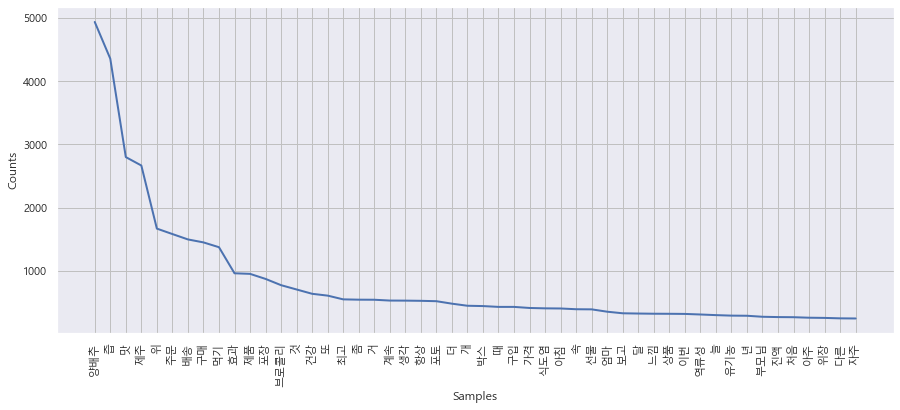

In [51]:
plt.figure(figsize=(15,6))
야채즙3사.plot(50)

In [52]:
data = 야채즙3사.vocab().most_common(300)
data[:100]

[('양배추', 4933),
 ('즙', 4353),
 ('맛', 2798),
 ('제주', 2665),
 ('위', 1668),
 ('주문', 1582),
 ('배송', 1497),
 ('구매', 1450),
 ('먹기', 1374),
 ('효과', 962),
 ('제품', 953),
 ('포장', 873),
 ('브로콜리', 774),
 ('것', 706),
 ('건강', 638),
 ('또', 609),
 ('최고', 550),
 ('좀', 545),
 ('거', 544),
 ('계속', 531),
 ('생각', 530),
 ('항상', 527),
 ('포토', 521),
 ('더', 482),
 ('개', 449),
 ('박스', 444),
 ('때', 431),
 ('구입', 431),
 ('가격', 414),
 ('식도염', 408),
 ('아침', 406),
 ('속', 394),
 ('선물', 392),
 ('엄마', 355),
 ('보고', 330),
 ('달', 326),
 ('느낌', 323),
 ('상품', 322),
 ('이번', 320),
 ('역류성', 311),
 ('늘', 301),
 ('유기농', 293),
 ('년', 291),
 ('부모님', 275),
 ('진액', 270),
 ('처음', 268),
 ('아주', 260),
 ('위장', 257),
 ('다른', 250),
 ('자주', 248),
 ('몸', 246),
 ('복용', 244),
 ('위염', 242),
 ('남편', 242),
 ('매일', 235),
 ('조금', 228),
 ('부담', 225),
 ('위해', 224),
 ('때문', 223),
 ('하루', 222),
 ('정도', 222),
 ('저', 219),
 ('유통', 219),
 ('매번', 215),
 ('기한', 213),
 ('정말', 212),
 ('다시', 212),
 ('안', 211),
 ('하나', 211),
 ('추천', 205),
 ('어머니', 203),
 ('두번째

#### stop words 수동

In [49]:
stop_words = '''리뷰 농원 포 룡 펼치기''' 
stop_list = stop_words.split()
new_token_list = []
for token in tokenss:
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list
new_tokenss = [token for token in new_tokens if token not in stop_list]

In [53]:
df.회사명.value_counts()

청룡농원    2180
GMM     2180
제주스     1660
Name: 회사명, dtype: int64

In [55]:
df.head(1)

,평점,내용,작성시간,채널,작성년월일,내용정제,회사명,맛이있다없다,선물관련키워드,키워드분류스
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,미분류,조부모,건강


In [57]:
df.선물관련키워드.value_counts()

미분류     5295
부모님      558
자녀       104
친구애인      47
조부모       16
Name: 선물관련키워드, dtype: int64

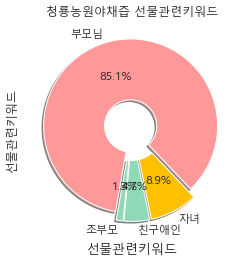

In [63]:
explode = [0.05, 0.05, 0.05,0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6','#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df[df.회사명 == '청룡농원']['선물관련키워드'].value_counts()[1:].plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('청룡농원야채즙 선물관련키워드')
plt.xlabel('선물관련키워드',size=(13))
plt.savefig('청룡농원선물관련키워드.png',dpi=350)

In [104]:
df['가족관련키워드'] = df.내용.apply(lambda x: '부모님' if (x.__contains__('어머니') or x.__contains__('엄마')or x.__contains__('아빠') or x.__contains__('아버지') or x.__contains__ ('부모')) else
                                            '자녀' if (x.__contains__('애들') or  x.__contains__('아들') or x.__contains__('딸') or x.__contains__('애기')  or x.__contains__('애들')  or x.__contains__('자식'))else
                                            '조부모' if (x.__contains__('할머니') or x.__contains__('할아버지') or x.__contains__('조부모') or x.__contains__('시어머니') or x.__contains__('장인') or x.__contains__('장모')) else 
                                            '친구애인' if (x.__contains__('남자친구') or x.__contains__('여자친구') or x.__contains__('남친') or x.__contains__('여친') or x.__contains__('친구')) else 
                                            '미분류'

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_6504/371885454.py, line 5)

In [71]:
df.회사명.value_counts()

청룡농원    2180
GMM     2180
제주스     1660
Name: 회사명, dtype: int64

In [83]:
df[df.회사명=='청룡농원'][-500:].index

Int64Index([3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349,
            ...
            3830, 3831, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3839],
           dtype='int64', length=500)

In [85]:
df[df.회사명=='GMM'][-500:].index

Int64Index([5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5529,
            ...
            6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019],
           dtype='int64', length=500)

In [91]:
df2.drop(df2[df2.회사명=='GMM'][-520:].index,inplace=True)

In [88]:
df2 = df.drop(df[df.회사명=='청룡농원'][-520:].index)

In [92]:
df2.회사명.value_counts()

제주스     1660
청룡농원    1660
GMM     1660
Name: 회사명, dtype: int64

In [94]:
# df2.reset_index(inplace=True,drop=True)

In [95]:
df2

,평점,내용,작성시간,채널,작성년월일,내용정제,회사명,맛이있다없다,선물관련키워드,키워드분류스
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,미분류,조부모,건강
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,맛이있다,미분류,건강
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스,맛이없다,미분류,건강
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스,맛이없다,미분류,건강
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스,미분류,부모님,건강
...,...,...,...,...,...,...,...,...,...,...
4975,5,e*t*****21.03.05.음야채를 골고루 안 먹는 아들땜에 상품평이 좋아서 구...,210305,G마켓,210305,음야채를 골고루 안 먹는 아들땜에 상품평이 좋아서 구매해봅니다리뷰펼치기,GMM,미분류,자녀,건강
4976,4,d*t*****20.05.07.속쓰림에 주문했어요위에 좋다길래 주문했어요좋아지길 바...,200507,G마켓,200507,속쓰림에 주문했어요위에 좋다길래 주문했어요좋아지길 바라며 열심히 먹어보려구요리뷰펼치기,GMM,미분류,미분류,건강
4977,4,m*n*****20.02.09.쿠폰 사용하니 가격 괜찮음다른 사이트보다 저렴하게 구...,200209,G마켓,200209,쿠폰 사용하니 가격 괜찮음다른 사이트보다 저렴하게 구매했어요 터키산 사과는 아쉽네요...,GMM,미분류,미분류,건강
4978,5,sunw****21.12.01.상품종류: 양배추브로콜리 진액 50포 x 1박스위가 ...,211201501,장대리,211201,상품종류 양배추브로콜리 진액 포 박스위가 불편할 때 하루 한 잔 도움이됩니다꾸준하...,GMM,미분류,미분류,건강


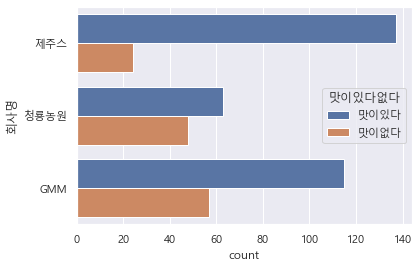

In [96]:
ax = sns.countplot(y="회사명", hue="맛이있다없다", data=df2[df2.맛이있다없다 !='미분류'])

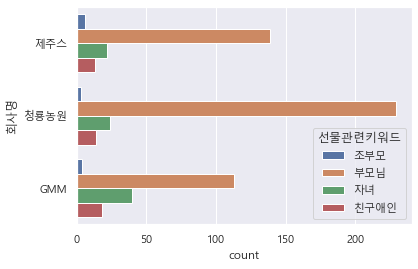

In [98]:
ax = sns.countplot(y="회사명", hue="선물관련키워드", data=df2[df2.선물관련키워드 !='미분류'])

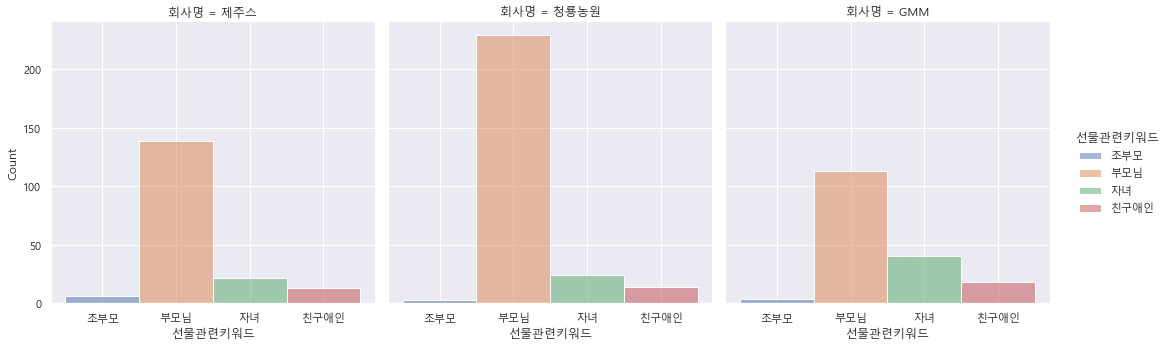

In [108]:
sns.displot(data=df2[df2.선물관련키워드 !='미분류'],col='회사명',x='선물관련키워드',hue='선물관련키워드')

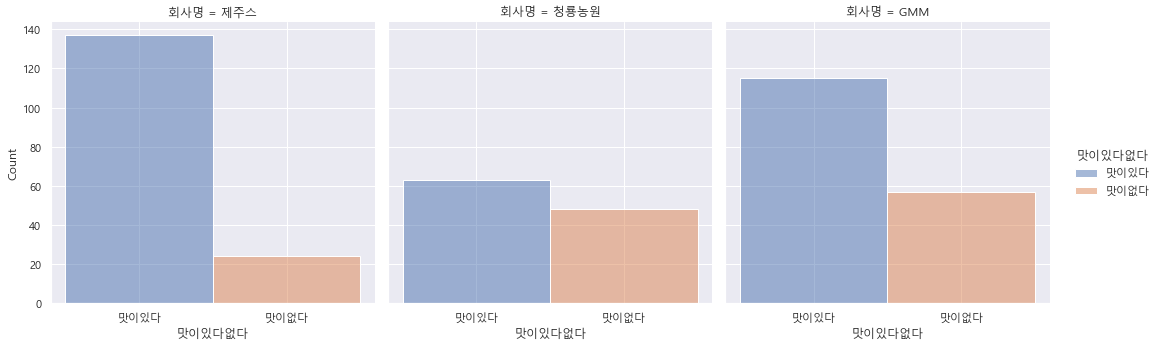

In [107]:
sns.displot(data=df2[df2.맛이있다없다 !='미분류'],col='회사명',x='맛이있다없다',hue='맛이있다없다')

In [171]:
df2.head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,회사명,맛이있다없다,선물관련키워드,키워드분류스,지혜스키워드,키워드크게분류
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,미분류,조부모,건강,미분류,건강
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,맛이있다,미분류,건강,미분류,맛


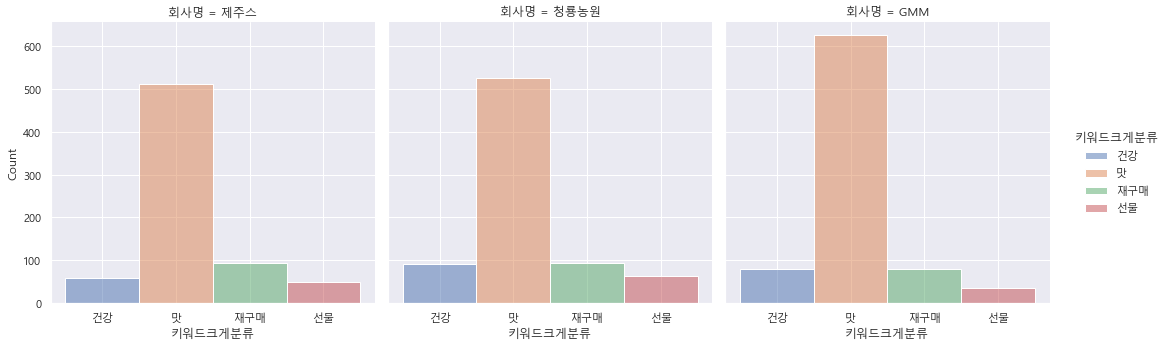

In [178]:
sns.displot(data=df2[df2.키워드크게분류 !='미분류'],col='회사명',x='키워드크게분류',hue='키워드크게분류')

In [106]:
df2['맛이있다없다'] = df2.내용.apply(lambda x: '맛이있다' if (x.__contains__('맛있') or 
                                                            x.__contains__('맛도좋다') or 
                                                            x.__contains__('먹을만함') or
                                                            x.__contains__('맛좋음') or
                                                            x.__contains__('부드러운맛') or
                                                            x.__contains__('맛있어서') or
                                                            x.__contains__('단맛'))
                                                            else '맛이없다' if ( x.__contains__('맛없') or
                                                            x.__contains__('없다') or 
                                                            x.__contains__('비위상함') or 
                                                            x.__contains__('노맛') or
                                                            x.__contains__('역하다') or
                                                            x.__contains__('참고') or
                                                            x.__contains__('부담스럽') or
                                                            x.__contains__('비리다') or
                                                            x.__contains__('맛이없다') or
                                                            x.__contains__('맛없음'))
                                                else '미분류' ) 

In [ ]:
구매목적

선물

In [ ]:
df['구매목적'] = df.내용정제.apply(lambda x: '맛' if (x.__contains__('맛') or x.__contains__('먹기')) else
                                            '선물' if (x.__contains__('선물') or x.__contains__('구매')) else
                                            '건강' if x.__contains__ ('주행') else
                                            '가격' if x.__contains__('보조금') else
                                            '제주' if x.__contains__('제주') else
                                            '기타' 
                                            
                                ) 

In [197]:
맛_list = '맛도, 맛, 목넘김, 제일맛. ,마시기편함,비리지않, 맛과향,맛중요,아이도,달달,거부감 없, 부드러움,진하지않,향이세지않,달콤,먹어본,제일 맛있다,먹을만,맛좋,복용가능,주스처,자주마,섞여있,덜부담,먹기힘들줄,매일먹음,연하,가볍,먹기편함,맛있어서,목넘김,냄새없'.split(',')
선물_list = '부모님,어머니,아들,온가족,남자친구,신랑,아버지,동생,'.split(',')
건강_list = '속쓰림,역류,식도,속편함,위,건강,속아픔,만성위염,소화불량,생명수,복부팽만,복통,변비,피부트러블'.split(',')
재구매_list = ' 2년 , 가정의달, 정기적, 매번, 5박스째, 지인, 매번주문. 일년째, 년넘게 , 주변추천. , 꾸준히, 없으면 안된, 홈쇼핑구매후, 떨어지지않게,꾸준'.split(',')

In [115]:
group = [맛_list,선물_list,건강_list,재구매_list]
df2['지혜스키워드'] = '미분류'
for 리스트 in group:
    for 아이템 in tqdm(리스트):
        if 리스트 == 맛_list:
            df2['지혜스키워드'] = df2.내용.apply(lambda x : '맛' if (x.__contains__(아이템)) 
            else if (리스트 == 선물_list: df2['지혜스키워드'] = df2.내용.apply(lambda x : '선물' if (x.__contains__(아이템)) else x)
                
            elif 리스트 == 건강_list:
                df2['지혜스키워드'] = df2.내용.apply(lambda x : '건강' if (x.__contains__(아이템)) else x)
                
            elif 리스트 == 재구매_list:
                df2['지혜스키워드'] = df2.내용.apply(lambda x : '재구매' if (x.__contains__(아이템)) else x)

100%|██████████| 15/15 [00:00<00:00, 376.14it/s]


In [198]:
group = [맛_list,선물_list,건강_list,재구매_list]
df2['키워드크게분류'] = '미분류'
for i in tqdm(range(len(맛_list))):
    try:
        df2['키워드크게분류'] = df2.내용.apply(lambda x: '선물' if (x.__contains__(group[3][i])) else 
                                        '건강' if (x.__contains__(group[0][i]) )else
                                        '재구매' if (x.__contains__(group[2][i])) else
                                        '맛' if (x.__contains__(group[1][i])) else x)
    except:
        pass

100%|██████████| 32/32 [00:00<00:00, 524.66it/s]


In [199]:
df2.키워드크게분류.value_counts()

맛      4953
재구매      18
건강        9
Name: 키워드크게분류, dtype: int64

In [128]:
group[0][0]
group[1][0]

'부모님'

In [124]:
df2.키워드크게분류.value_counts()

[' 2년 ', ' 가정의달', ' 정기적', ' 매번', ' 5박스째', ' 소개', ' 지인', ' 매번주문. 일년째', ' 년넘게 ', ' 주변추천. ', ' 꾸준히', ' 없으면 안된', ' 홈쇼핑구매후', ' 떨어지지않게', '꾸준']                                         742
lej4****21.10.19.속을 편하게 해주어서 장기복용중입니다~  아주좋아요!!속을 편하게 해주어서 장기복용중입니다~  아주좋아요!!리뷰펼치기                                                                                                 2
룡농원71bu****21.02.21.제주 빨간양배추즙 75포: 제주 빨간양배추즙 75포조금심심하긴한데 뭔가 첨가된맛은아니라서 좋아요 역류성 식도염이 있어 주문했는데 먹어보고 좋으면 또 주문할께요조금심심하긴한데 뭔가 첨가된맛은아니라서 좋아요 역류성 식도염이 있어 주문했는데 먹어보고 좋으면 또 주문할께요리뷰펼치기      2
룡농원koh0****21.07.12.배송빠르고 먹기도 괜찮네요 맛은 밍밍해요 신랑도 잘먹네요 속이쓰려서 시켜봤는데 먹어보고 좋아지면 재주문할께요배송빠르고 먹기도 괜찮네요 맛은 밍밍해요 신랑도 잘먹네요 속이쓰려서 시켜봤는데 먹어보고 좋아지면 재주문할께요리뷰펼치기                                  2
룡농원guse****22.01.02.먹던거 다먹어서 다시주문했어요 다른데꺼도 먹어봤는데 물을 너무타서 넘 물맛나던데 이건 찐해요 양배추맛제대로ㅎ먹던거 다먹어서 다시주문했어요 다른데꺼도 먹어봤는데 물을 너무타서 넘 물맛나던데 이건 찐해요 양배추맛제대로ㅎ리뷰펼치기                                  2
                                                                                               

In [116]:
df2.지혜스키워드.value_counts()

재구매                                                                                                                                                                              742
lej4****21.10.19.속을 편하게 해주어서 장기복용중입니다~  아주좋아요!!속을 편하게 해주어서 장기복용중입니다~  아주좋아요!!리뷰펼치기                                                                                                 2
룡농원71bu****21.02.21.제주 빨간양배추즙 75포: 제주 빨간양배추즙 75포조금심심하긴한데 뭔가 첨가된맛은아니라서 좋아요 역류성 식도염이 있어 주문했는데 먹어보고 좋으면 또 주문할께요조금심심하긴한데 뭔가 첨가된맛은아니라서 좋아요 역류성 식도염이 있어 주문했는데 먹어보고 좋으면 또 주문할께요리뷰펼치기      2
룡농원koh0****21.07.12.배송빠르고 먹기도 괜찮네요 맛은 밍밍해요 신랑도 잘먹네요 속이쓰려서 시켜봤는데 먹어보고 좋아지면 재주문할께요배송빠르고 먹기도 괜찮네요 맛은 밍밍해요 신랑도 잘먹네요 속이쓰려서 시켜봤는데 먹어보고 좋아지면 재주문할께요리뷰펼치기                                  2
룡농원guse****22.01.02.먹던거 다먹어서 다시주문했어요 다른데꺼도 먹어봤는데 물을 너무타서 넘 물맛나던데 이건 찐해요 양배추맛제대로ㅎ먹던거 다먹어서 다시주문했어요 다른데꺼도 먹어봤는데 물을 너무타서 넘 물맛나던데 이건 찐해요 양배추맛제대로ㅎ리뷰펼치기                                  2
                                                                                               

In [157]:
df2.내용.str.contains('맛').value_counts()

False    3320
True     1660
Name: 내용, dtype: int64

In [ ]:
df2['키워드'] = df2.내용정제.apply(lambda x: '맛' if (x.__contains__('맛') or x.__contains__('먹기')) else
                                            '편의성' if (x.__contains__('배송') or x.__contains__('구매')) else
                                            '재료' if x.__contains__ ('주행') else
                                            '가격' if x.__contains__('보조금') else
                                            '제주' if x.__contains__('제주') else
                                            '기타' 
                                            
                                ) 